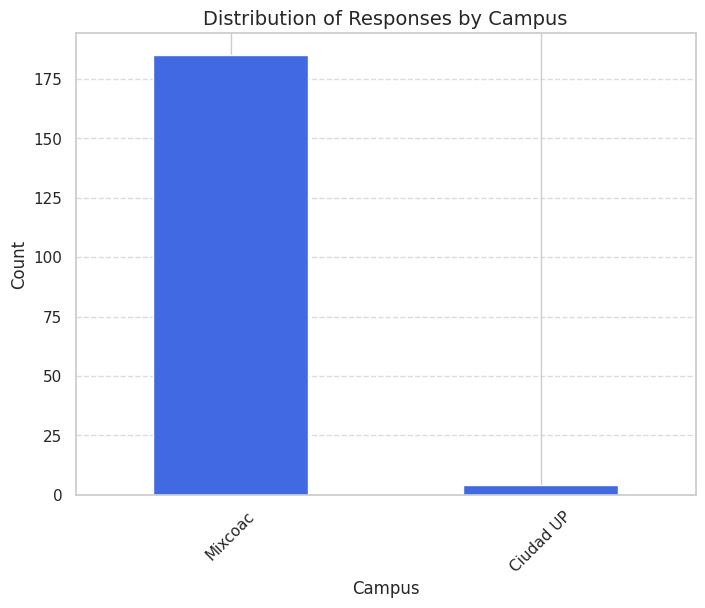

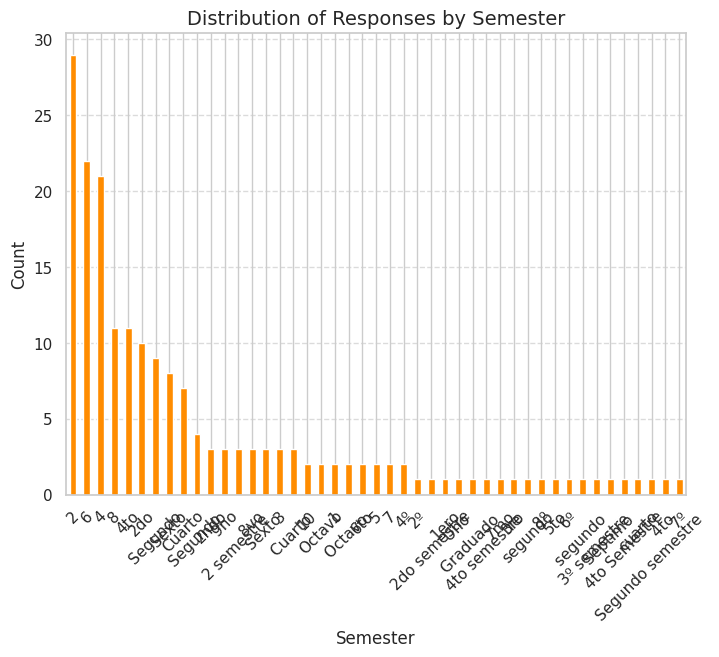

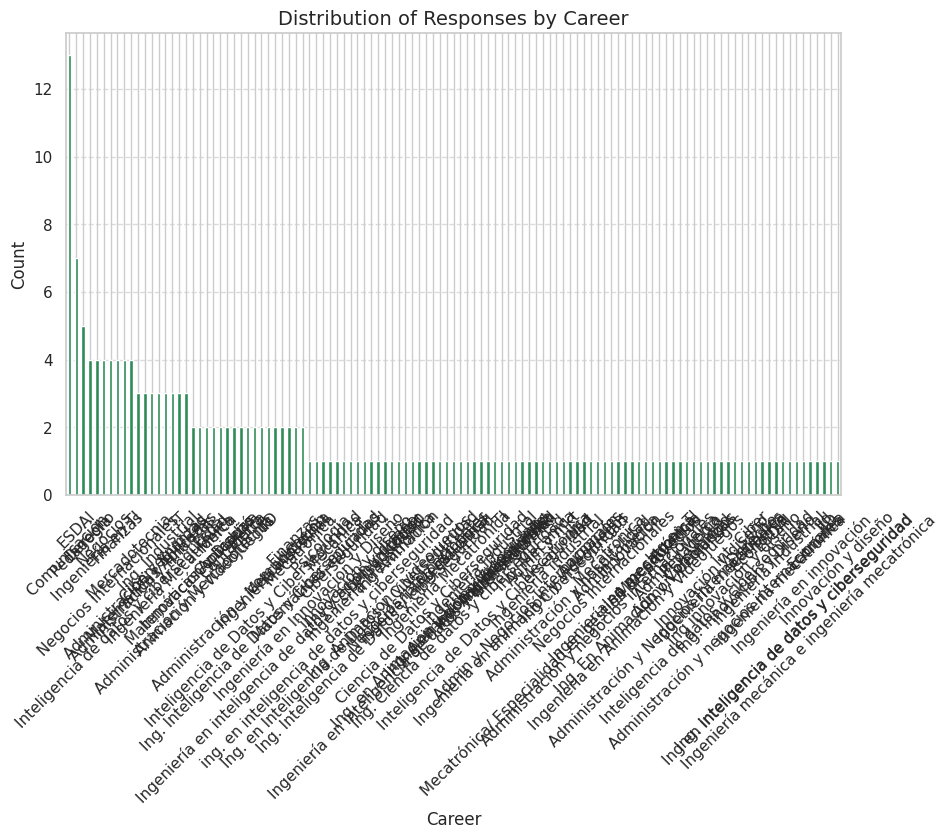

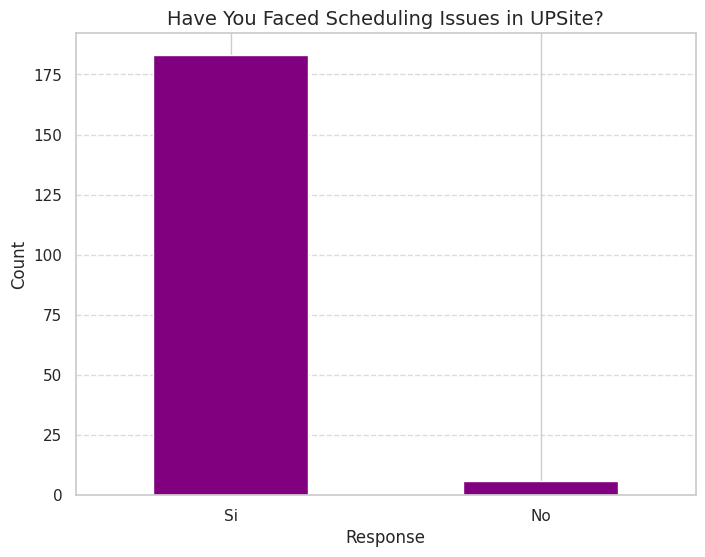

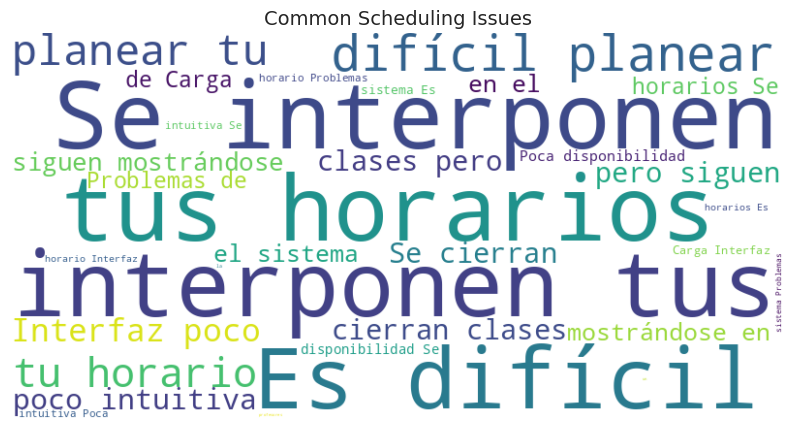

/tmp/ipykernel_2139108/2234319066.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count", y="Factor", data=factor_df, palette="coolwarm")


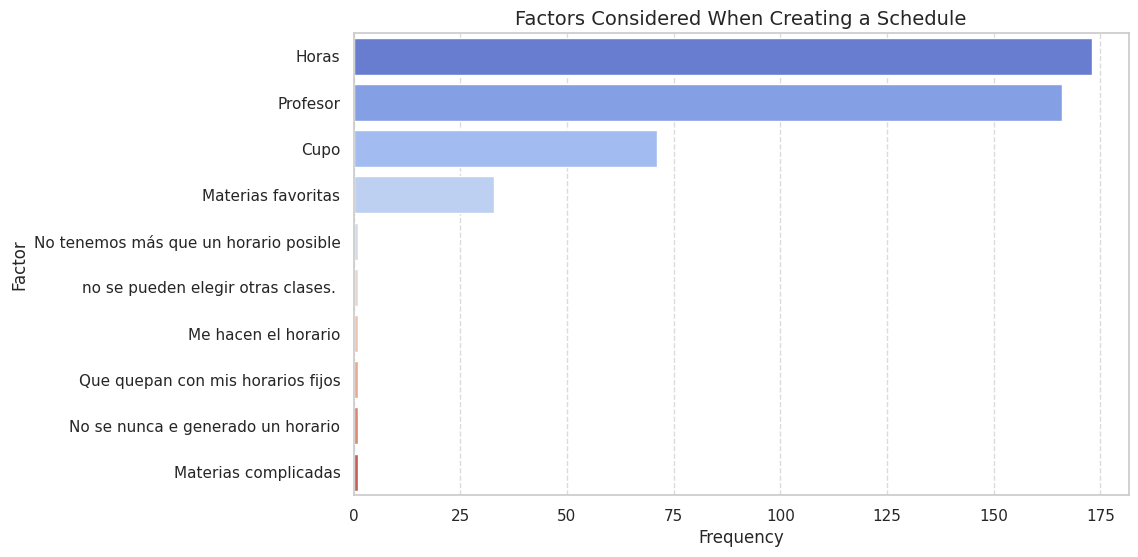

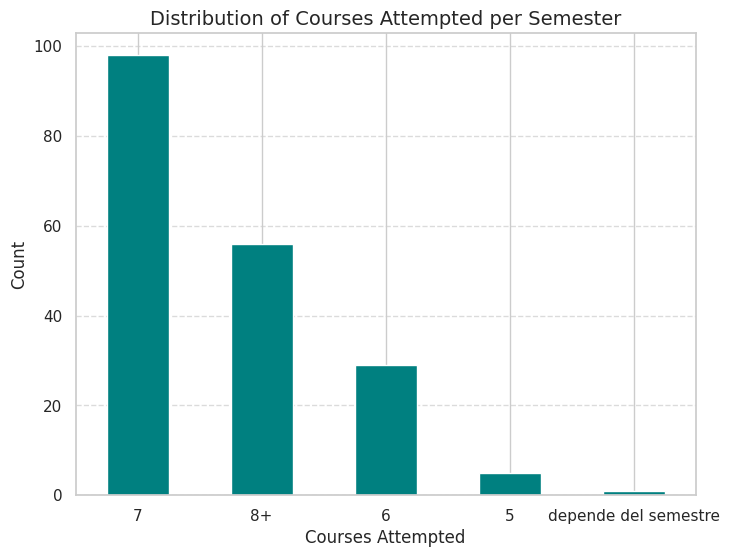

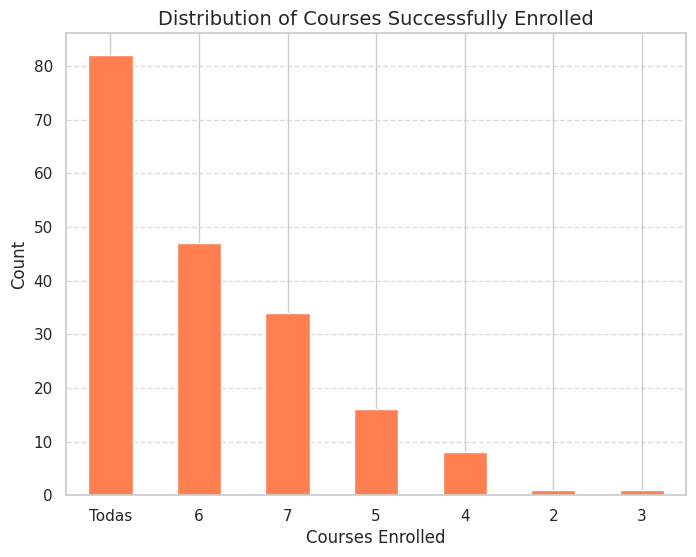

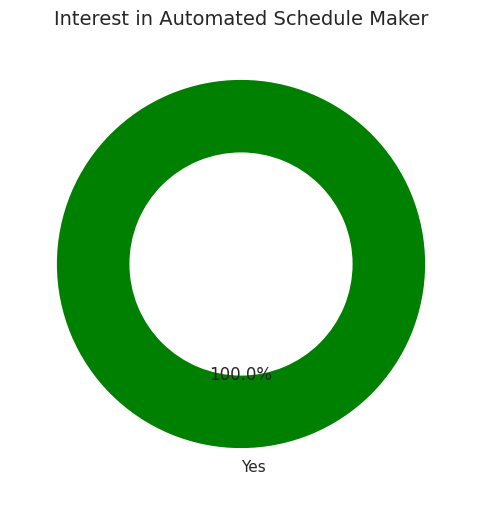

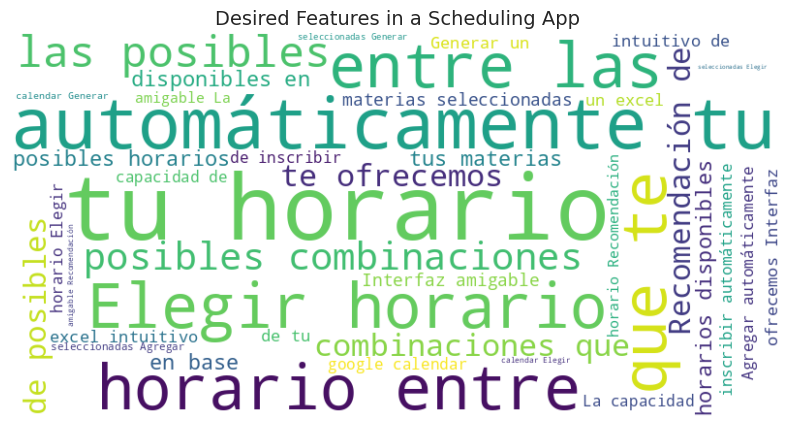

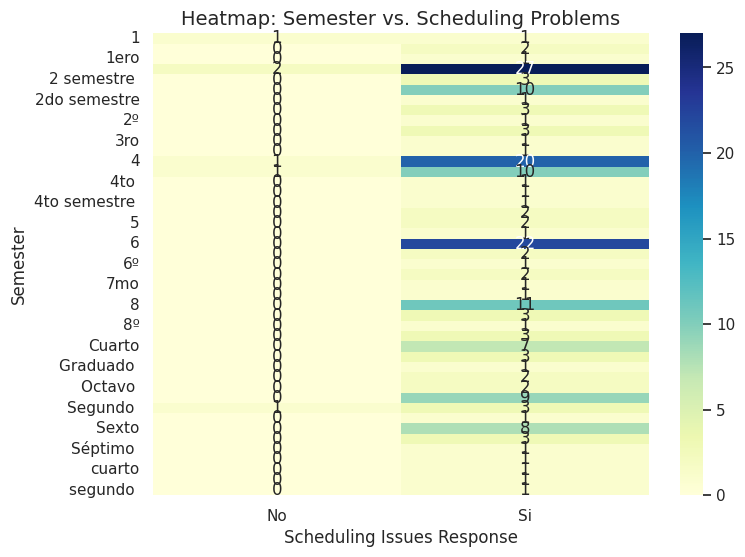

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load the dataset
file_path = "./Market Analysis Schedule Maker Responses.csv"
df = pd.read_csv(file_path)

# Set Seaborn style for aesthetics
sns.set(style="whitegrid")

# 1. Campus Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
df["¿Qué Campus eres?"].value_counts().plot(kind="bar", color="royalblue")
plt.title("Distribution of Responses by Campus", fontsize=14)
plt.xlabel("Campus", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Semester Distribution (Bar Chart)
plt.figure(figsize=(8, 6))
df["¿Qué Semestre?"].value_counts().plot(kind="bar", color="darkorange")
plt.title("Distribution of Responses by Semester", fontsize=14)
plt.xlabel("Semester", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3. Career Distribution (Bar Chart)
plt.figure(figsize=(10, 6))
df["¿Qué Carrera?"].value_counts().plot(kind="bar", color="seagreen")
plt.title("Distribution of Responses by Career", fontsize=14)
plt.xlabel("Career", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. Scheduling Problems (Yes/No Count Chart)
plt.figure(figsize=(8, 6))
df["¿Has tenido problemas para generar tu horario en UPSite?"].value_counts().plot(kind="bar", color="purple")
plt.title("Have You Faced Scheduling Issues in UPSite?", fontsize=14)
plt.xlabel("Response", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 5. Common Scheduling Issues (Word Cloud)
issues_text = " ".join(df["¿Qué problemas has tenido?"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(issues_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Scheduling Issues", fontsize=14)
plt.show()

# 6. Factors Considered When Creating a Schedule (Bar Chart)
factors_list = df["¿Qué factores tomas en consideración al crear tu horario?"].dropna().str.split(", ")
factors_flat = [factor for sublist in factors_list for factor in sublist]
factor_counts = Counter(factors_flat)
factor_df = pd.DataFrame(factor_counts.items(), columns=["Factor", "Count"]).sort_values(by="Count", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Factor", data=factor_df, palette="coolwarm")
plt.title("Factors Considered When Creating a Schedule", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Factor", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 7. Courses Attempted per Semester (Bar Chart)
plt.figure(figsize=(8, 6))
df["¿Cuántas materias metes por semestre?"].value_counts().plot(kind="bar", color="teal")
plt.title("Distribution of Courses Attempted per Semester", fontsize=14)
plt.xlabel("Courses Attempted", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 8. Courses Successfully Enrolled (Bar Chart)
plt.figure(figsize=(8, 6))
df["De esas materias, ¿cuántas materias lograste meter?"].value_counts().plot(kind="bar", color="coral")
plt.title("Distribution of Courses Successfully Enrolled", fontsize=14)
plt.xlabel("Courses Enrolled", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 9. Interest in an Automated Schedule Maker (Donut Chart)
plt.figure(figsize=(8, 6))
# Determine interest based on whether the response field is filled (as a proxy for 'Yes')
interest_counts = df["¿Usarías una aplicación para generar disponibles horarios? En caso de confirmar, ¿qué características te gustaría ver?"].dropna() \
                    .apply(lambda x: "Yes" if len(x) > 3 else "No").value_counts()
plt.pie(interest_counts, labels=interest_counts.index, autopct="%1.1f%%", startangle=90, colors=["green", "red"], wedgeprops=dict(width=0.4))
plt.title("Interest in Automated Schedule Maker", fontsize=14)
plt.show()

# 10. Desired Features in a Scheduling App (Word Cloud)
features_text = " ".join(df["¿Usarías una aplicación para generar disponibles horarios? En caso de confirmar, ¿qué características te gustaría ver?"].dropna())
wordcloud_features = WordCloud(width=800, height=400, background_color="white").generate(features_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_features, interpolation="bilinear")
plt.axis("off")
plt.title("Desired Features in a Scheduling App", fontsize=14)
plt.show()

# 11. Heatmap: Semester vs. Scheduling Problems
crosstab = pd.crosstab(df["¿Qué Semestre?"], df["¿Has tenido problemas para generar tu horario en UPSite?"])
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap: Semester vs. Scheduling Problems", fontsize=14)
plt.xlabel("Scheduling Issues Response", fontsize=12)
plt.ylabel("Semester", fontsize=12)
plt.show()


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv(file_path)
df["Has tenido problemas para ver tus calificaciones?"] = np.random.choice(
    ["Si", "No"],
    size=len(df),
    p=[0.76, 0.24]
)

# 2. Define the six predefined options for the new "Qué problemas has tenido (nueva)" question.
options = [
    "Interfaz poco intuitiva",
    "Campos vacíos",
    "Tengo indicadores",
    "Se tardan en reflejar en UP4U",
    "Tiempo de carga amplio",
    "Información incorrecta en las calificaciones"
]

# Adjusted probabilities: "Interfaz poco intuitiva" (30%) and "Tengo indicadores" (25%) get more weight
# "Información incorrecta en las calificaciones" gets the least weight (5%)
weights = [0.3, 0.15, 0.35, 0.05, 0.1, 0.05]

df["Qué problemas has tenido (nueva)"] = np.random.choice(
    options,
    size=len(df),
    p=weights
)

df.to_csv(file_path, index=False)


# Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Bar Chart for "Has tenido problemas para ver tus calificaciones?"
plt.figure(figsize=(8, 6))
sns.countplot(x=df["Has tenido problemas para ver tus calificaciones?"], palette="coolwarm")
plt.title("Distribution of Responses: 'Has tenido problemas para ver tus calificaciones?'", fontsize=14)
plt.xlabel("Response", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2. Bar Chart for "Qué problemas has tenido (nueva)"
plt.figure(figsize=(10, 6))
sns.countplot(y=df["Qué problemas has tenido (nueva)"], palette="viridis", order=df["Qué problemas has tenido (nueva)"].value_counts().index)
plt.title("Distribution of Reported Problems Viewing Grades", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Problem Type", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



ValueError: probabilities do not sum to 1